# Author : Jayalakshmi Karthikeyan

# Task1 - Prediction Using Supervised ML

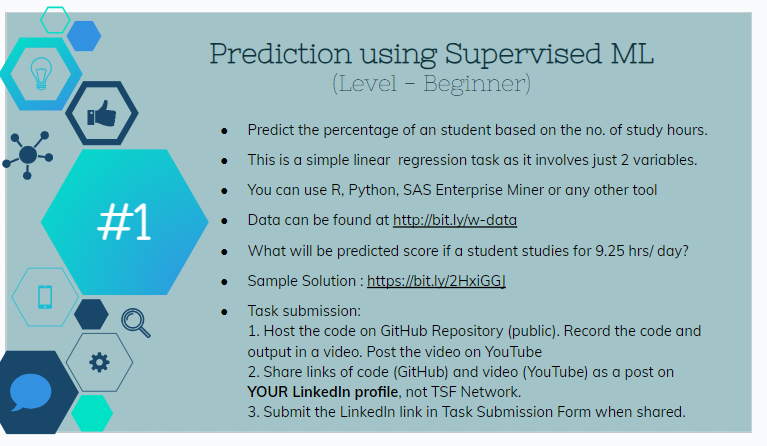

## Problem Statement :

     1.Predict the Percentage of an student based on the No. of Study hours.
     2.Applying Simple Linear regression 
    

### Importing Libraries

In [2]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline

### Loading dataset 

In [3]:
data_url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [5]:
data = pd.read_csv(data_url)
print("Data imported successfully")

Data imported successfully


In [6]:
# Checking data loaded correctly or not
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
# plotting to understand data

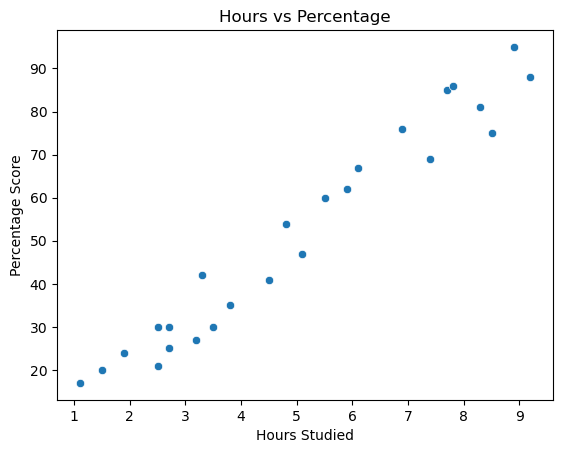

In [8]:
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Observation
 1. There is a Linear relationship between Hours studied and Percentage scored

## Preparing the data

In [11]:
# X contains the feature (independent variable)
X = data[['Hours']].values  

# y contains the target variable (dependent variable) 
y = data['Scores'].values 

### Spliting traininig data and test data

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Train Model

In [14]:
from sklearn.linear_model import LinearRegression  
LinearReg  = LinearRegression()  
LinearReg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


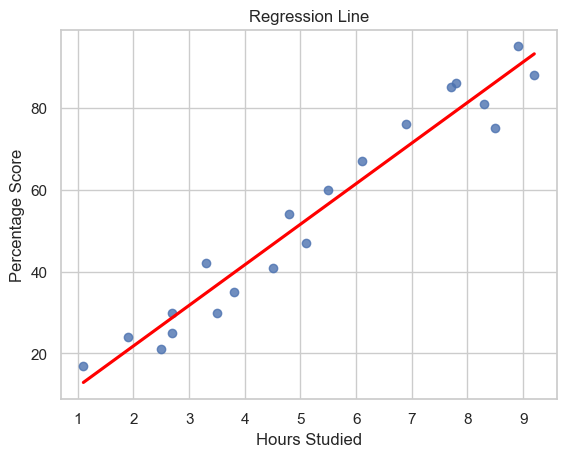

In [16]:
# Plotting with seaborn
sns.set(style="whitegrid")  # Set the style of the plot

# Create a scatter plot with a regression line
sns.regplot(x=X_train.flatten(), y=y_train, ci=None, line_kws={'color': 'red'})

# Customize the plot
plt.title('Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

# Show the plot
plt.show()

### Predicting the target value

In [17]:
# Testing data - In Hours
print(X_test) 


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
 # Predicting the scores
y_pred = LinearReg.predict(X_test)

In [20]:
# Create a DataFrame with Actual and Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluating the model

#### 1.Mean Squared Error (MSE):

Calculate the mean squared difference between the predicted and actual values.
Lower values indicate better model performance.

In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 21.5987693072174


#### 2.Root Mean Squared Error (RMSE):

Take the square root of the MSE to obtain a metric in the same units as the target variable.
Similar to MSE, lower values are better.

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 4.6474476121003665


#### 3.R-squared (Coefficient of Determination):

Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
Ranges from 0 to 1; higher values indicate better fit.

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9454906892105356


#### 4.Mean Absolute Error (MAE):

Measures the average absolute difference between the predicted and actual values.
Similar to MSE and RMSE, lower values are better.

In [30]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 4.183859899002975


#### 5.Residual Analysis:

Examine the residuals (the differences between actual and predicted values).
Plotting residuals can help identify patterns or heteroscedasticity.

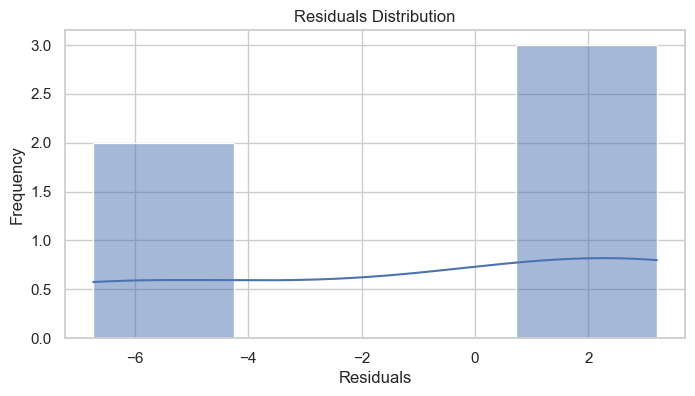

In [31]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### 6.  Scatter plot of actual vs predicted values

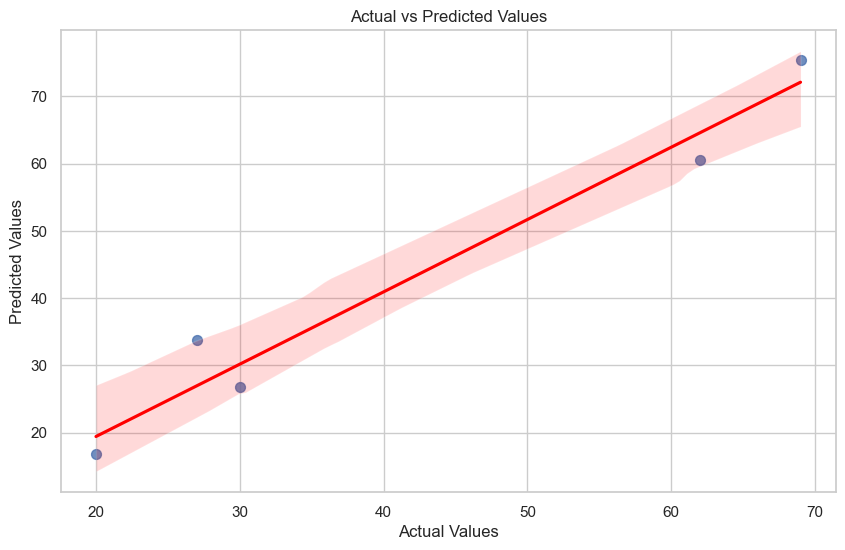

In [23]:
# Plotting the comparison using a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Evaluation Metrics Report

In [32]:
# Creating a DataFrame to display the results
results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'R-squared', 'Mean Absolute Error'],
    'Value': [mse, rmse, r2, mae]
})

In [34]:
# Printing the table
print("Evaluation Metrics:")
print(results)

Evaluation Metrics:
                    Metric      Value
0       Mean Squared Error  21.598769
1  Root Mean Squared Error   4.647448
2                R-squared   0.945491
3      Mean Absolute Error   4.183860


### Testing with our own data

In [36]:
new_hours = np.array([[9.25]])
own_pred = LinearReg.predict(new_hours)
print("No of Hours = {}".format(new_hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538
